# Part 1



Question 1

Write a regex to extract all the numbers with orange color background from the below text in italics.


{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}


In [1]:
import re

In [2]:
ques={"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}
result=re.findall(r'\s[0-9]+',str(ques))

print(result)

[' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', ' 10', ' 11', ' 648', ' 649', ' 650', ' 651', ' 652', ' 653', ' 3']


# Part 2

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.layers import Dense,Input,Activation,Flatten,BatchNormalization,Dropout
from keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import datetime
from keras.initializers import he_normal
from tensorflow.keras.optimizers import Adam
import tensorboard
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
import pickle
import os
from keras.models import load_model

In [4]:
data=pd.read_csv('train_data_evaluation_part_2.csv')

In [5]:
data.shape

(82580, 30)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
data.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

# Business Problem

Train a machine learning model (preferably with a neural network) that 
predicts the customer who is going to be checked in. Once done, please test 
the prediction with below test data.


# Performance Metric

The performance metric I have used is Confusion Matrix,F1 Score

## Exploratory data analysis

In [9]:
data.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41289.500000,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,4.667958,2.369411,405.935457,408.245071,0.047518,0.001429,0.000254,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,4.562507,2.281758,346.502341,347.247127,0.212744,0.037774,0.015945,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,0.000000,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20644.750000,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,42.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41289.500000,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,4.000000,2.000000,378.000000,388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61934.250000,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,7.000000,4.000000,698.000000,705.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,1104.000000,1186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82580 non-null  int64  
 1   ID                    82580 non-null  int64  
 2   Nationality           82580 non-null  object 
 3   Age                   78834 non-null  float64
 4   DaysSinceCreation     82580 non-null  int64  
 5   AverageLeadTime       82580 non-null  int64  
 6   LodgingRevenue        82580 non-null  float64
 7   OtherRevenue          82580 non-null  float64
 8   BookingsCanceled      82580 non-null  int64  
 9   BookingsNoShowed      82580 non-null  int64  
 10  BookingsCheckedIn     82580 non-null  int64  
 11  PersonsNights         82580 non-null  int64  
 12  RoomNights            82580 non-null  int64  
 13  DaysSinceLastStay     82580 non-null  int64  
 14  DaysSinceFirstStay    82580 non-null  int64  
 15  DistributionChannel

In [11]:
data["Age"].value_counts()


50.0     2015
51.0     2013
54.0     1965
53.0     1913
49.0     1871
         ... 
110.0       1
122.0       1
96.0        1
109.0       1
91.0        1
Name: Age, Length: 105, dtype: int64

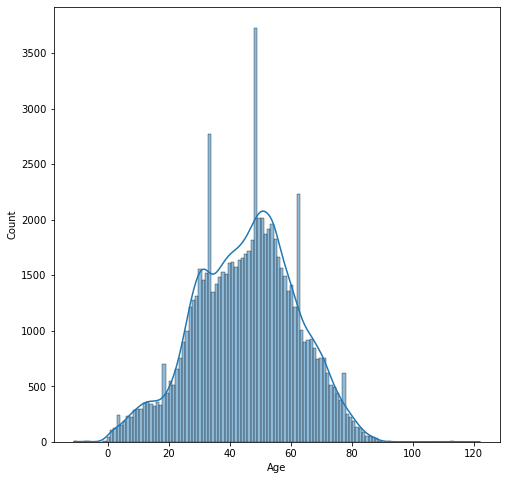

In [12]:
plt.figure(figsize=(8,8))

sns.histplot(data['Age'],kde=True)
plt.show()

We can say that most of the age groups lie between 30-65.

There are some outliers too like there is age which is less than 0 and there are people with age >80

We will remove outliers and age which is less than 0

In [13]:
len(data[data['Age']>80])

731

In [14]:
data=data[data['Age']>0]


Remove the age outliers in data

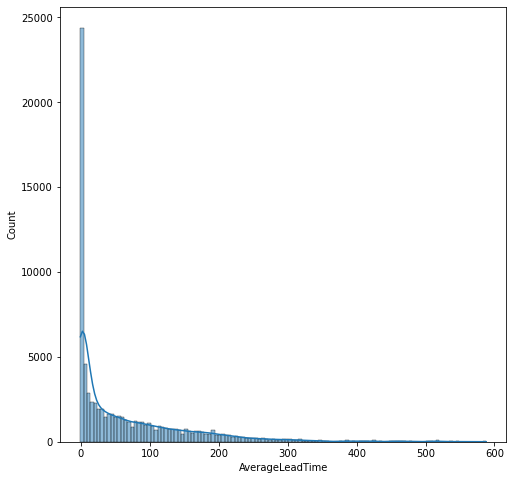

In [15]:
plt.figure(figsize=(8,8))

sns.histplot(data['AverageLeadTime'],kde=True)
plt.show()

In [16]:
data=data[data['AverageLeadTime']>=0]

By seeing data.describe information we can see that time value has value less than 0.Therefore removing outlier of Average lead time.

In [17]:
data.shape

(78768, 30)

In [18]:
data.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000,78768.000000
mean,41809.464529,41810.464529,45.502844,452.085809,67.192540,304.002909,68.289998,0.001866,0.000584,0.796999,4.719975,2.388572,399.307917,401.529847,0.048357,0.001473,0.000241,0.000889,0.002882,0.001803,0.012657,0.356261,0.143751,0.000317,0.003618,0.000127,0.090659
std,23719.045885,23719.045885,16.482405,308.530324,88.154436,368.500788,112.809760,0.066347,0.028499,0.691590,4.582284,2.195950,342.944640,343.666935,0.214521,0.038347,0.015529,0.029798,0.053606,0.042421,0.111792,0.478897,0.350840,0.017813,0.060043,0.011267,0.287125
min,0.000000,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21426.750000,21427.750000,34.000000,179.000000,0.000000,69.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,40.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41860.500000,41861.500000,46.000000,395.000000,31.000000,237.600000,40.500000,0.000000,0.000000,1.000000,4.000000,2.000000,365.000000,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62408.250000,62409.250000,57.000000,709.000000,105.000000,409.200000,89.000000,0.000000,0.000000,1.000000,8.000000,4.000000,683.000000,686.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,116.000000,116.000000,1104.000000,1117.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After removing outliers we can see that there is no negative values in age section and average lead time section

In [19]:
data.duplicated().sum()

0

There is no duplicated values in the data

In [20]:
data['Nationality'].value_counts().index

Index(['FRA', 'DEU', 'GBR', 'PRT', 'ESP', 'USA', 'ITA', 'BEL', 'BRA', 'NLD',
       ...
       'BHS', 'JEY', 'TMP', 'TON', 'TKM', 'VIR', 'GIN', 'FLK', 'PCN', 'LCA'],
      dtype='object', length=187)

There are 188 countries in our dataset and here are the below top 20 countries whose peope made more booking. 

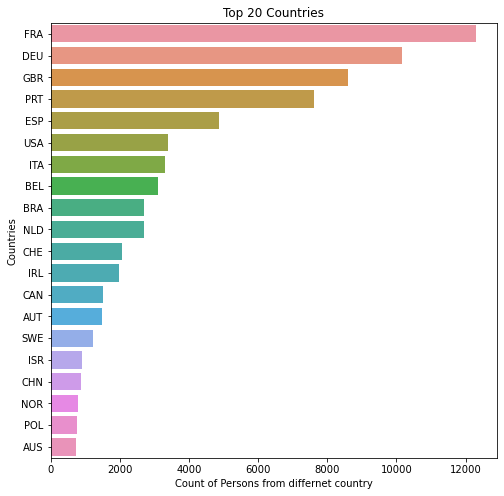

In [21]:
plt.figure(figsize=(8,8))
sns.barplot(y=data['Nationality'].value_counts().index[:20],x=data['Nationality'].value_counts().values[:20],data=data)
plt.xlabel('Count of Persons from differnet country')
plt.ylabel('Countries')
plt.title("Top 20 Countries")
plt.show()

We can say that contries FRA and PRT made more bookings.



In [22]:
values=data['MarketSegment'].value_counts().values

In [23]:
labels=data['MarketSegment'].value_counts().index

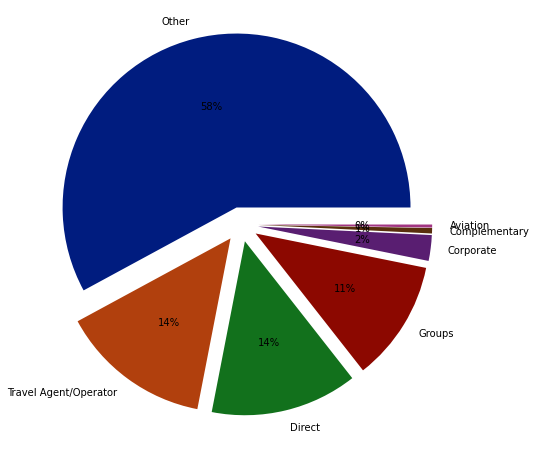

In [24]:
plt.figure(figsize=(8,8))
data1=values
keys=labels
explode = [0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1]

palette_color = sns.color_palette('dark')

plt.pie(data1, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

plt.show()

As we can see that market major segment is shared by other which is 58% and then travel/agent operator

In [25]:
values=data['DistributionChannel'].value_counts().values
labels=data['DistributionChannel'].value_counts().index

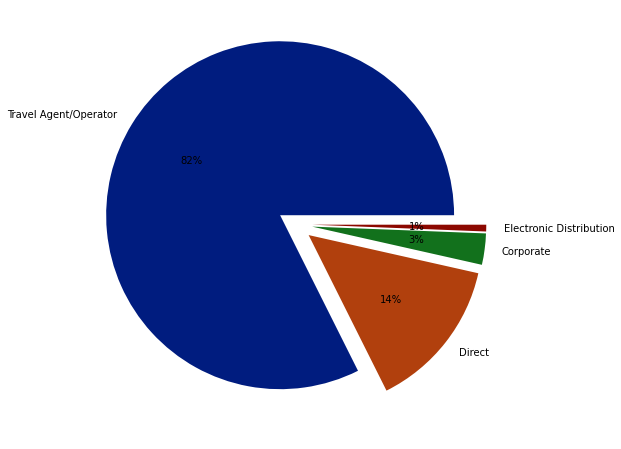

In [26]:
plt.figure(figsize=(8,8))
data1=values
keys=labels
explode = [0.1, 0.1, 0.1, 0.1]

palette_color = sns.color_palette('dark')
  

plt.pie(data1, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  

plt.show()

As we can see that distribution channel is shared by Travel Agent/Operator which is 82% and then by Direct

In the below cell I have taken all the binary columns into list called binary_columns and do the analysis on it.

In [27]:
binary_columns=['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom']

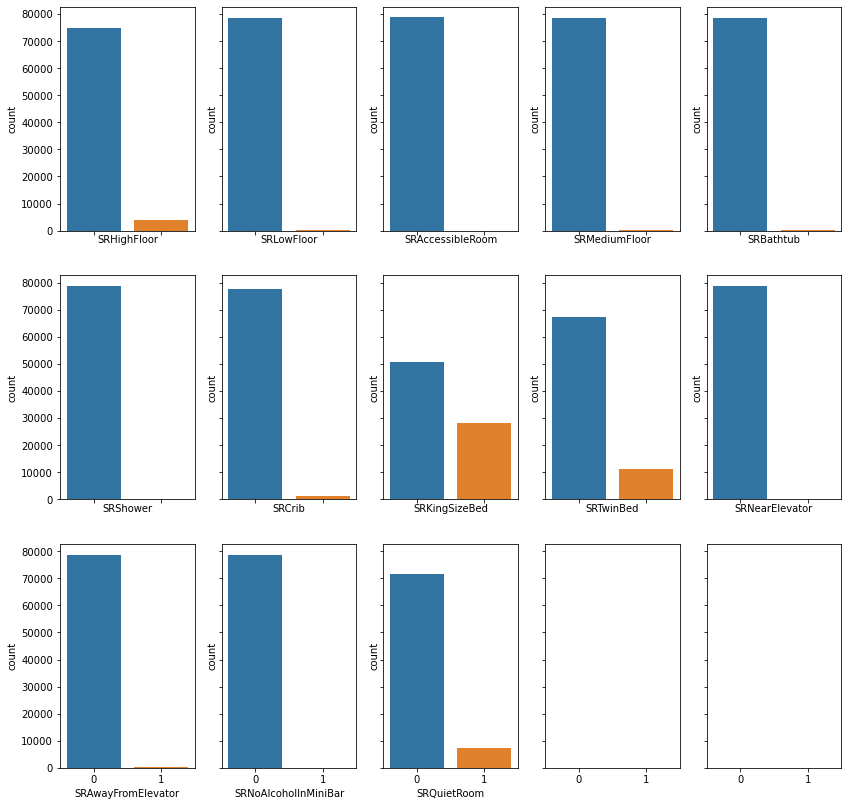

In [28]:
fig,ax=plt.subplots(3,5,sharex=True,sharey=True,figsize=(14,14))
ax=ax.reshape(-1)
for i,j in enumerate (binary_columns):
    sns.countplot(x=data[j],data=data,ax=ax[i])
plt.show()

From the above graphs we can say that people would like to live in rooms which is situated on high floor, which has king size bed,which has twin be. Most people also like quiet room too

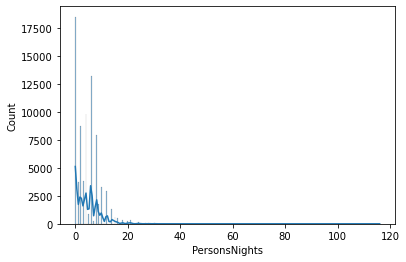

In [29]:
sns.histplot(x=data['PersonsNights'],data=data,kde=True)
plt.show()

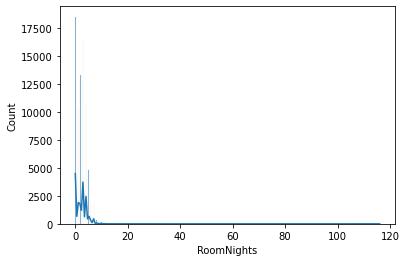

In [30]:
sns.histplot(x=data['RoomNights'],data=data,kde=True)
plt.show()

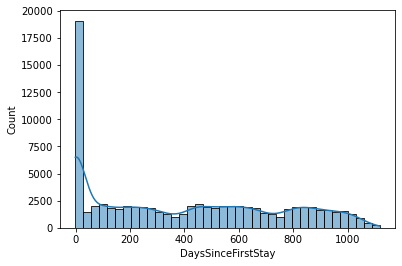

In [31]:
sns.histplot(x=data['DaysSinceFirstStay'],data=data,kde=True)
plt.show()

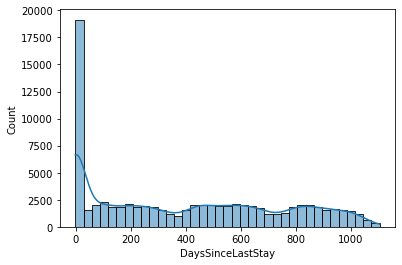

In [32]:
sns.histplot(x=data['DaysSinceLastStay'],data=data,kde=True)
plt.show()

In [33]:
print(data.shape)

(78768, 30)


In [34]:
data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,6,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
dummy_column_distribution=pd.get_dummies(data['DistributionChannel'])

In [36]:
dummy_column_distribution


,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
0,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
...,...,...,...,...
82574,0,0,0,1
82575,0,0,0,1
82576,0,0,0,1
82577,0,0,0,1


In [37]:
dummy_column_market=pd.get_dummies(data['MarketSegment'])

In [38]:
dummy_column_market

,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
82574,0,0,0,0,0,1,0
82575,0,0,0,0,0,1,0
82576,0,0,0,0,0,1,0
82577,0,0,0,0,0,1,0


In [39]:
data_new_1=pd.concat([dummy_column_distribution,dummy_column_market],axis=1)

In [40]:
data_new_1.shape

(78768, 11)

In [41]:
data_new=data.drop(['Nationality','DistributionChannel','Unnamed: 0','MarketSegment','ID'],axis=1)

In [42]:
data_new.shape

(78768, 25)

In [43]:
data_new_1=pd.concat([data_new,data_new_1],axis=1)

In [44]:
data_new_1.shape

(78768, 36)

In [45]:
data_new_1.isnull().sum()

Age                        0
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
Corporate                  0
Direct                     0
Electronic Distribution    0
Travel Agent/Operator      0
Aviation                   0
Complementary              0
Corporate                  0
Direct                     0
Groups                     0
Other         

In [46]:
data_new_1.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Corporate,Direct,Electronic Distribution,Travel Agent/Operator,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
0,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [47]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data_new_1)

In [48]:
data_scaled=pd.DataFrame(data_scaled,columns=data_new_1.columns)

In [49]:
data_scaled.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Corporate,Direct,Electronic Distribution,Travel Agent/Operator,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
0,0.413223,0.127424,0.076531,0.038317,0.013622,0.111111,0.0,0.045455,0.068966,0.043103,0.137557,0.961538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.247934,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.487603,1.000000,0.158163,0.024787,0.007762,0.000000,0.0,0.015152,0.086207,0.043103,0.996380,0.984794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.413223,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.438017,1.000000,0.098639,0.023754,0.003105,0.000000,0.0,0.015152,0.034483,0.017241,0.993665,0.982111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
pca=PCA(n_components=2)
data_pca=pca.fit_transform(data_scaled)

In [51]:
data_pca.shape

(78768, 2)

In [52]:
clustering = KMeans(n_clusters=2,init='k-means++', 
                    n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
clustering.fit_predict(data_pca)
train_labels=clustering.labels_


In [53]:
print(train_labels)

[1 0 0 ... 0 0 0]


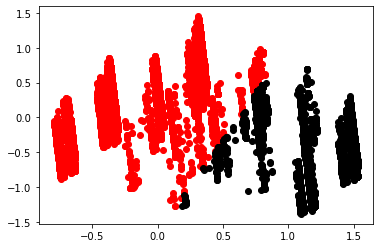

In [54]:
filtered_label0 = data_pca[train_labels == 0]
 
filtered_label1 = data_pca[train_labels == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

In [55]:
data_scaled.shape

(78768, 36)

In [56]:
data_scaled['Kmean-Labels'] = train_labels
data_scaled['Kmean-Labels'].value_counts()

0    66249
1    12519
Name: Kmean-Labels, dtype: int64

In [57]:
data_scaled.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Corporate,Direct,Electronic Distribution,Travel Agent/Operator,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator,Kmean-Labels
0,0.413223,0.127424,0.076531,0.038317,0.013622,0.111111,0.0,0.045455,0.068966,0.043103,0.137557,0.961538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,0.247934,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.487603,1.000000,0.158163,0.024787,0.007762,0.000000,0.0,0.015152,0.086207,0.043103,0.996380,0.984794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.413223,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.438017,1.000000,0.098639,0.023754,0.003105,0.000000,0.0,0.015152,0.034483,0.017241,0.993665,0.982111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [58]:
data_scaled.shape

(78768, 37)

# Train - Test Split


# Model 1

This model take dummy features + original features. I have done clustering and taken number of clusters =2 for binary classification task as either will person be going to checked in or not.

The binary value 0 means that person will be going to checked in and binary value 1 means that person will not be going to be 
checked in.

In [59]:
y=data_scaled['Kmean-Labels'].values
X=data_scaled.drop(['Kmean-Labels'],axis=1)

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [61]:
print((X_train.shape),y_train.shape)
print((X_test.shape),y_test.shape)

(59076, 36) (59076,)
(19692, 36) (19692,)


In [62]:
input_shape=(36,)
model1=Sequential()

model1.add(Dense(64,activation='relu',input_shape=input_shape,kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model1.add((Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add((Dense(16,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))))
model1.add(Dense(1, activation='sigmoid',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model1.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2368      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                        

C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [63]:
# log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

history=model1.fit(X_train,y_train,epochs=10,verbose=1,batch_size=32,
         validation_data=(X_test,y_test))

Epoch 1/10
1847/1847 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.9554 - val_loss: 0.1369 - val_accuracy: 0.9896
Epoch 2/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.1380 - accuracy: 0.9906 - val_loss: 0.1126 - val_accuracy: 0.9963
Epoch 3/10
1847/1847 [==============================] - 4s 2ms/step - loss: 0.1156 - accuracy: 0.9941 - val_loss: 0.0991 - val_accuracy: 0.9987
Epoch 4/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.1022 - accuracy: 0.9958 - val_loss: 0.0898 - val_accuracy: 0.9990
Epoch 5/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0934 - accuracy: 0.9967 - val_loss: 0.0832 - val_accuracy: 0.9990
Epoch 6/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9976 - val_loss: 0.0770 - val_accuracy: 0.9991
Epoch 7/10
1847/1847 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9976 - val_loss: 0.0712 - val_accuracy:

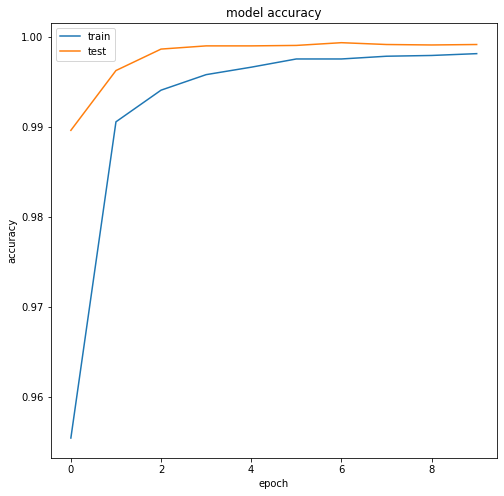

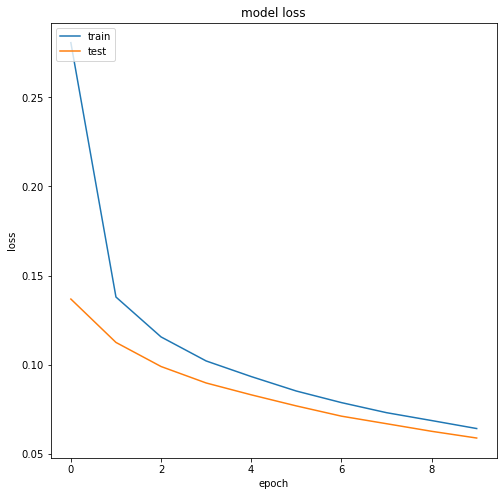

In [64]:
# machine learning mastery
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
y_pred=model1.predict(X_test)


print(y_test)
print(len(y_test))

print(y_pred)

[0 0 0 ... 0 0 0]
19692
[[1.9268582e-05]
 [3.8488507e-03]
 [5.8189034e-03]
 ...
 [2.0946949e-05]
 [4.0732539e-05]
 [8.2069535e-05]]


In [66]:
print(y_pred)

result=list(map(lambda x:1 if x>=0.5 else 0,y_pred))
print(len(result))

[[1.9268582e-05]
 [3.8488507e-03]
 [5.8189034e-03]
 ...
 [2.0946949e-05]
 [4.0732539e-05]
 [8.2069535e-05]]
19692


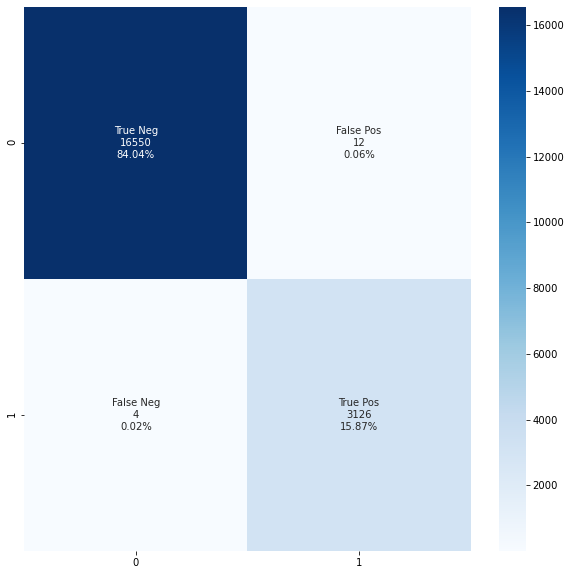

In [67]:
cf_matrix=(confusion_matrix(y_test,result))


# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
plt.figure(figsize=(10,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

In [68]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16562
           1       1.00      1.00      1.00      3130

    accuracy                           1.00     19692
   macro avg       1.00      1.00      1.00     19692
weighted avg       1.00      1.00      1.00     19692



Taken a random sample of points to check the model,how model is performing.

In [69]:
data_sample=data_scaled.sample(n=40000)
y_actual=data_sample['Kmean-Labels'].values

In [70]:
data_sample_1=data_sample.drop(['Kmean-Labels'],axis=1)

data_sample_1.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Corporate,Direct,Electronic Distribution,Travel Agent/Operator,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
7269,0.289256,0.848569,0.232993,0.022386,0.004851,0.0,0.0,0.015152,0.051724,0.025862,0.846154,0.836315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51754,0.421488,0.211450,0.197279,0.055946,0.020633,0.0,0.0,0.015152,0.103448,0.034483,0.222624,0.220036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36061,0.314050,0.402585,0.013605,0.026956,0.011060,0.0,0.0,0.015152,0.051724,0.025862,0.409050,0.404293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8015,0.421488,0.836565,0.326531,0.018384,0.002329,0.0,0.0,0.015152,0.017241,0.017241,0.833484,0.823792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59716,0.347107,0.150508,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
y_predicted=model1.predict(data_sample_1)

print(y_predicted)

[[6.2682440e-05]
 [1.4841557e-04]
 [4.2482810e-05]
 ...
 [1.4501810e-04]
 [3.1845022e-05]
 [1.7118454e-04]]


In [72]:
result_new=list(map(lambda x:1 if x>=0.5 else 0,y_pred))
print(len(result_new))
# print(result)

19692


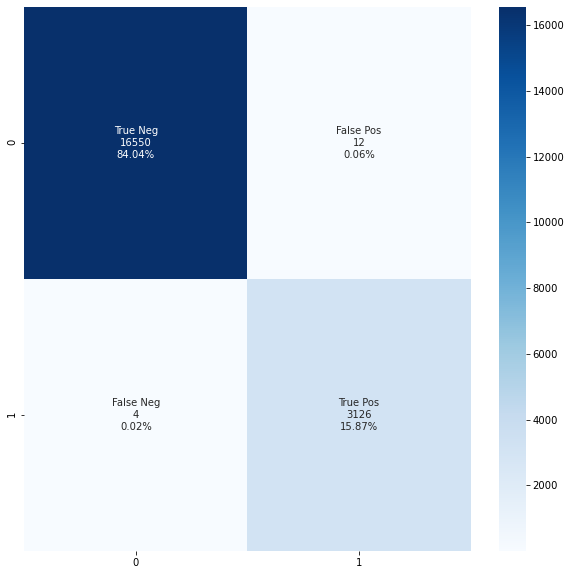

In [73]:
cf_matrix=(confusion_matrix(y_test,result_new))


# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
plt.figure(figsize=(10,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

# Model 2

This model take original features. I have done clustering and taken number of clusters =2 for binary classification task as either will person be going to checked in or not.

The feature are visualized by PCA with n_compenents =2. The number of clusters taken 2 beacause I have to classify the 
either will person be going to checked in or not. The number of clusters can be taken more than 2 by using elbow method. 


The binary value 0 means that person will be going to checked in and binary value 1 means that person will not be going to be 
checked in.

In [74]:
data_new.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,0,0,0,0,0,0,0,0,0,0,0,0,0
2,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
scaler=MinMaxScaler()
data_scaled_basic=scaler.fit_transform(data_new)

data_scaled_basic=pd.DataFrame(data_scaled_basic,columns=data_new.columns)

pca=PCA(n_components=2)
data_pca_basic=pca.fit_transform(data_scaled_basic)


In [76]:
data_pca_basic.shape

(78768, 2)

In [77]:
clustering = KMeans(n_clusters=2,init='k-means++', 
                    n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='elkan')
clustering.fit_predict(data_pca_basic)
train_labels=clustering.labels_

print(train_labels)

[0 0 0 ... 1 0 0]


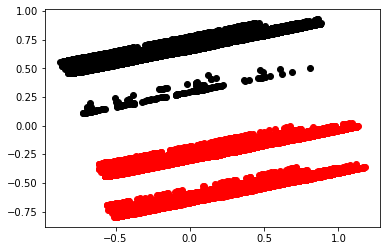

In [78]:
filtered_label0 = data_pca_basic[train_labels == 0]
 
filtered_label1 = data_pca_basic[train_labels == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

In [79]:
data_scaled_basic.shape

(78768, 25)

In [80]:
data_scaled_basic['labels']=train_labels
data_scaled_basic['labels'].value_counts()

0    50706
1    28062
Name: labels, dtype: int64

In [81]:
y=data_scaled_basic['labels'].values
X=data_scaled_basic.drop(['labels'],axis=1)

In [82]:
data_scaled_basic.shape

(78768, 26)

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42,shuffle=True)

print((X_train.shape),y_train.shape)
print((X_test.shape),y_test.shape)

(59076, 25) (59076,)
(19692, 25) (19692,)


In [84]:
input_shape=(25,)
model2=Sequential()

model2.add(Dense(64,activation='relu',input_shape=input_shape,kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model2.add((Dense(32,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())
model2.add((Dense(8,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))))
model2.add(Dense(1, activation='sigmoid',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model2.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1664      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                      

C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [85]:
history=model2.fit(X_train,y_train,epochs=10,verbose=1,batch_size=32,
         validation_data=(X_test,y_test))

Epoch 1/10
1847/1847 [==============================] - 4s 2ms/step - loss: 0.2885 - accuracy: 0.9320 - val_loss: 0.0900 - val_accuracy: 0.9998
Epoch 2/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0921 - accuracy: 0.9974 - val_loss: 0.0645 - val_accuracy: 1.0000
Epoch 3/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0687 - accuracy: 0.9986 - val_loss: 0.0562 - val_accuracy: 1.0000
Epoch 4/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9994 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 5/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0493 - accuracy: 0.9996 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 6/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0423 - accuracy: 0.9997 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 7/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0360 - accuracy: 0.9997 - val_loss: 0.0319 - val_accuracy:

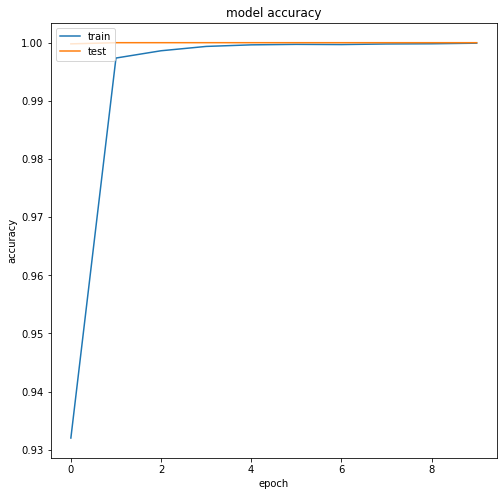

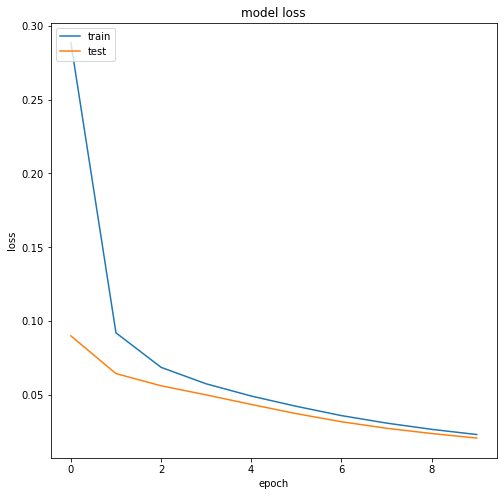

In [86]:
# machine learning mastery
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
y_pred=model2.predict(X_test)


print(y_test)
print(len(y_test))

[0 0 0 ... 0 1 0]
19692


In [88]:
result=list(map(lambda x:1 if x>=0.5 else 0,y_pred))
print(len(result))
# print(result)

19692


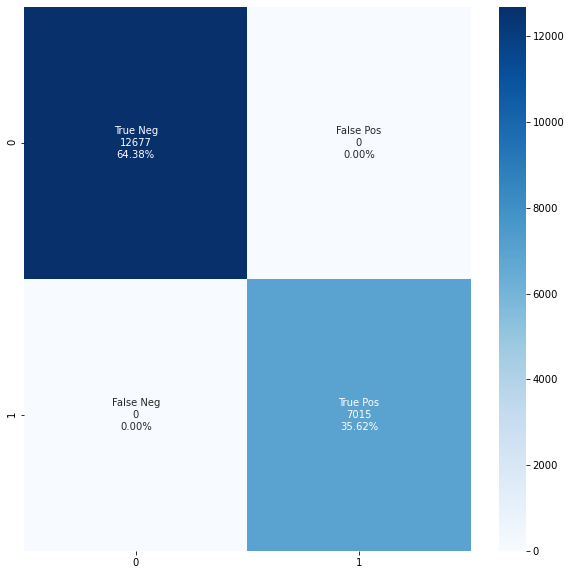

In [89]:
cf_matrix=(confusion_matrix(y_test,result))


# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
plt.figure(figsize=(10,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

In [90]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12677
           1       1.00      1.00      1.00      7015

    accuracy                           1.00     19692
   macro avg       1.00      1.00      1.00     19692
weighted avg       1.00      1.00      1.00     19692



Taken a random sample of points to check the model,how model is performing.

In [91]:
data_sample=data_scaled_basic.sample(n=40000)
y_actual=data_sample['labels'].values

In [92]:
data_sample_1=data_sample.drop(['labels'],axis=1)

data_sample_1.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
76295,0.404959,0.030471,0.115646,0.047845,0.001423,0.0,0.0,0.015152,0.043103,0.043103,0.046154,0.045617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30851,0.280992,0.475531,0.049320,0.017041,0.003169,0.0,0.0,0.015152,0.025862,0.008621,0.478733,0.473166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32487,0.214876,0.450600,0.000000,0.017351,0.003234,0.0,0.0,0.015152,0.017241,0.008621,0.454299,0.449016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4342,0.429752,0.900277,0.005102,0.027576,0.004269,0.0,0.0,0.015152,0.017241,0.008621,0.895023,0.884615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32285,0.330579,0.453370,0.435374,0.038539,0.009055,0.0,0.0,0.015152,0.086207,0.043103,0.460633,0.455277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [93]:
y_predicted=model2.predict(data_sample_1)

print(y_predicted)

[[9.9995100e-01]
 [7.5960811e-06]
 [9.9995887e-01]
 ...
 [1.1515917e-05]
 [1.9154750e-05]
 [1.1251373e-05]]


In [94]:
result_new=list(map(lambda x:1 if x>=0.5 else 0,y_pred))
print(len(result_new))
# print(result)

19692


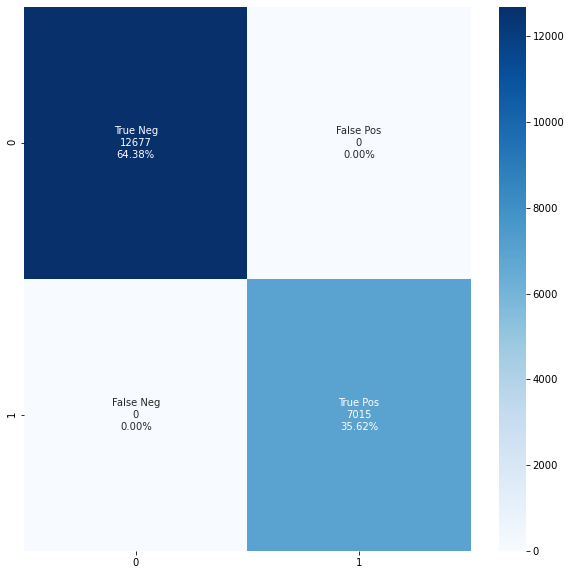

In [95]:
cf_matrix=(confusion_matrix(y_test,result_new))


# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
plt.figure(figsize=(10,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

# Model 3 Birch

This model take original features. I have done clustering using BIRCH Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the large dataset that retains as much information as possible and taken number of clusters =2 for binary classification task as either will person be going to checked in or not.

The feature are visualized by PCA with n_compenents =2. The number of clusters taken 2 beacause I have to classify the 
either will person be going to checked in or not. The number of clusters can be taken more than 2 by using elbow method. 


The binary value 0 means that person will be going to checked in and binary value 1 means that person will not be going to be 
checked in.

In [96]:
data_new_1.shape

(78768, 36)

In [97]:
scaler=MinMaxScaler()
data_scaled_birch=scaler.fit_transform(data_new_1)

data_scaled_birch=pd.DataFrame(data_scaled_birch,columns=data_new_1.columns)

pca=PCA(n_components=2)
data_pca_birch=pca.fit_transform(data_scaled_birch)

data_pca_birch.shape

(78768, 2)

In [98]:
birch=Birch(n_clusters=2)
birch.fit(data_pca_birch)
birch.predict(data_pca_birch)

birch_labels = birch.labels_

In [99]:
data_scaled_birch['labels']=birch_labels
data_scaled_birch['labels'].value_counts()

0    66830
1    11938
Name: labels, dtype: int64

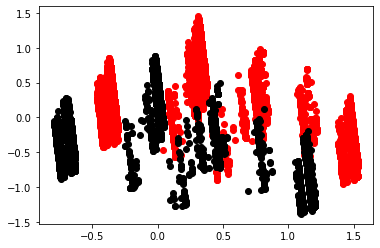

In [100]:
filtered_label0 = data_pca_birch[train_labels == 0]
 
filtered_label1 = data_pca_birch[train_labels == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

In [101]:
y=data_scaled_birch['labels'].values
X=data_scaled_birch.drop(['labels'],axis=1)

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

print((X_train.shape),y_train.shape)
print((X_test.shape),y_test.shape)

(59076, 36) (59076,)
(19692, 36) (19692,)


In [103]:
input_shape=(36,)
model3=Sequential()

model3.add(Dense(64,activation='relu',input_shape=input_shape,kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model3.add((Dense(32,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add((Dense(16,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))))
model3.add(Dense(1, activation='sigmoid',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model3.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                2368      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                      

C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [104]:
history=model3.fit(X_train,y_train,epochs=10,verbose=1,batch_size=32,
         validation_data=(X_test,y_test))

Epoch 1/10
1847/1847 [==============================] - 5s 2ms/step - loss: 0.2630 - accuracy: 0.9509 - val_loss: 0.1098 - val_accuracy: 0.9962
Epoch 2/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.1123 - accuracy: 0.9910 - val_loss: 0.0816 - val_accuracy: 0.9971
Epoch 3/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0898 - accuracy: 0.9935 - val_loss: 0.0721 - val_accuracy: 0.9981
Epoch 4/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0789 - accuracy: 0.9948 - val_loss: 0.0659 - val_accuracy: 0.9986
Epoch 5/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0712 - accuracy: 0.9959 - val_loss: 0.0613 - val_accuracy: 0.9989
Epoch 6/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0658 - accuracy: 0.9966 - val_loss: 0.0577 - val_accuracy: 0.9990
Epoch 7/10
1847/1847 [==============================] - 3s 2ms/step - loss: 0.0617 - accuracy: 0.9973 - val_loss: 0.0548 - val_accuracy:

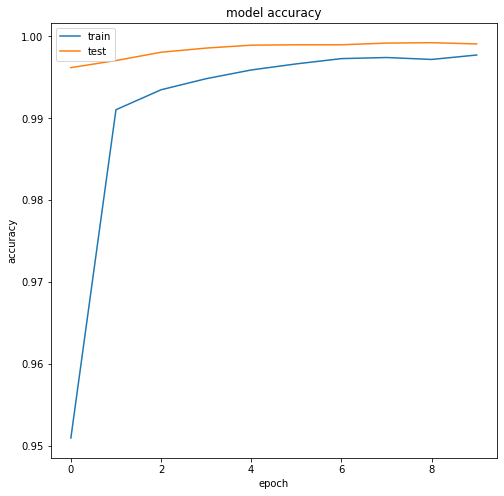

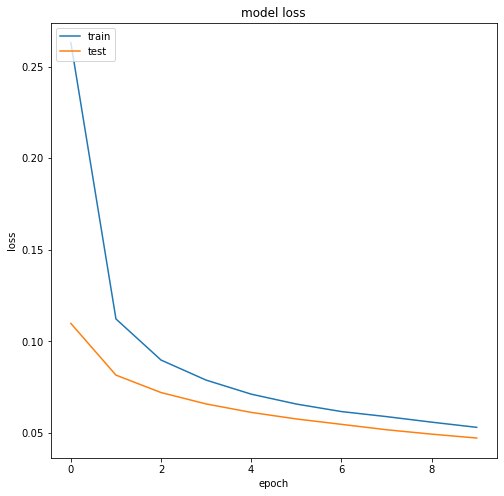

In [105]:
# machine learning mastery
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [106]:
y_pred=model3.predict(X_test)


print(y_test)
print(len(y_test))

[1 1 0 ... 0 0 0]
19692


In [107]:
result=list(map(lambda x:1 if x>=0.5 else 0,y_pred))
print(len(result))
# print(result)

19692


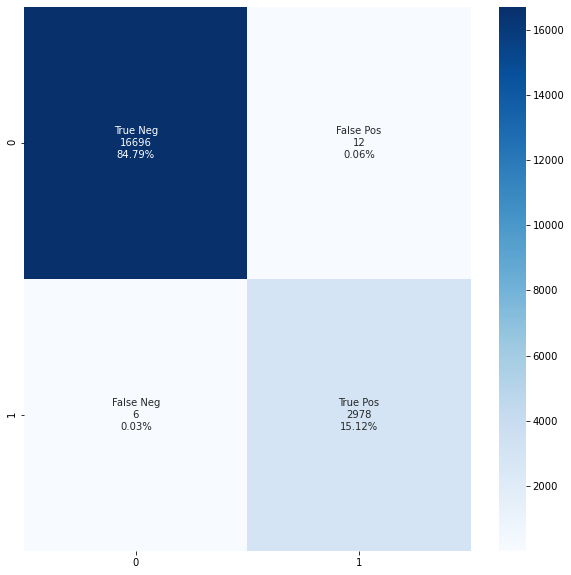

In [108]:
cf_matrix=(confusion_matrix(y_test,result))


# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
plt.figure(figsize=(10,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

In [109]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16708
           1       1.00      1.00      1.00      2984

    accuracy                           1.00     19692
   macro avg       1.00      1.00      1.00     19692
weighted avg       1.00      1.00      1.00     19692



Taken a random sample of points to check the model,how model is performing.

In [110]:
data_sample=data_scaled_birch.sample(n=40000)
y_actual=data_sample['labels'].values

In [111]:
data_sample_1=data_sample.drop(['labels'],axis=1)

data_sample_1.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Corporate,Direct,Electronic Distribution,Travel Agent/Operator,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
26198,0.322314,0.539243,0.215986,0.056236,0.005433,0.0,0.0,0.015152,0.017241,0.008621,0.541176,0.534884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16800,0.545455,0.706371,0.051020,0.027039,0.010090,0.0,0.0,0.015152,0.051724,0.025862,0.706787,0.698569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18033,0.413223,0.683287,0.005102,0.029662,0.000517,0.0,0.0,0.015152,0.034483,0.034483,0.685068,0.677102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10883,0.190083,0.789474,0.134354,0.098994,0.008150,0.0,0.0,0.015152,0.025862,0.025862,0.788235,0.779070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26596,0.297521,0.533703,0.154762,0.017893,0.003881,0.0,0.0,0.015152,0.034483,0.017241,0.536652,0.530411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
y_predicted=model3.predict(data_sample_1)

print(y_predicted)

[[3.7416798e-05]
 [1.9663599e-05]
 [2.9616263e-05]
 ...
 [7.1789123e-05]
 [9.9995887e-01]
 [2.2682967e-05]]


In [113]:
result_new=list(map(lambda x:1 if x>=0.5 else 0,y_pred))
print(len(result_new))
# print(result)

19692


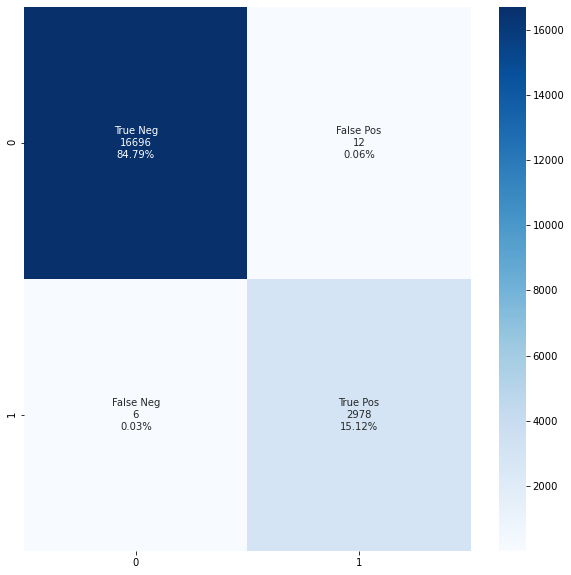

In [114]:
cf_matrix=(confusion_matrix(y_test,result_new))


# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
plt.figure(figsize=(10,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

# Model 4 

This model take original features. I have done clustering using and taken number of clusters =2 for binary classification task as either will person be going to checked in or not.

The feature I used for classification are ['Age', 'AverageLeadTime', 'PersonsNights', 'RoomNights', 'TotalRevenue']
Total Revenue is the sum of lodging revenue + other revenue.

These features are taken beacuse they are explaining the variance in data.These feature can help in making cluster more easily
and more good as their intercluster distance would be large and intracluster distance would be small.Other features are not explaining that much variance.

The feature are visualized by PCA with n_compenents =2. The number of clusters taken 2 beacause I have to classify the 
either will person be going to checked in or not. The number of clusters can be taken more than 2 by using elbow method. 


The binary value 0 means that person will be going to checked in and binary value 1 means that person will not be going to be 
checked in.

In [115]:
data['TotalRevenue']=data['LodgingRevenue'] + data['OtherRevenue']

In [116]:
train_df_new = data[['Age', 'AverageLeadTime', 'PersonsNights', 'RoomNights', 'TotalRevenue']]

In [117]:
# Standardizing the data
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

scaler=min_max.fit(train_df_new)
train_df_scaled=scaler.transform(train_df_new)

In [118]:
with open('model_min_max.pkl', 'wb') as files1:
    pickle.dump(scaler, files1)

In [119]:
# train_df_scaled=min_max.fit_transform(train_df_new)

In [120]:
train_df_scaled= pd.DataFrame(train_df_scaled, columns=train_df_new.columns)
train_df_scaled.head()

,Age,AverageLeadTime,PersonsNights,RoomNights,TotalRevenue
0,0.413223,0.076531,0.068966,0.043103,0.039922
1,0.247934,0.000000,0.000000,0.000000,0.000000
2,0.487603,0.158163,0.086207,0.043103,0.025145
3,0.413223,0.000000,0.000000,0.000000,0.000000
4,0.438017,0.098639,0.034483,0.017241,0.021290


In [121]:
# Reducing the dimensions to two
pca=PCA(2)
df_reduced=pca.fit_transform(train_df_scaled)

In [122]:
kmeans = KMeans(n_clusters=2,init='k-means++', 
                n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
kmeans.fit_predict(df_reduced)
labels=kmeans.labels_
labels

array([1, 1, 0, ..., 1, 1, 1])

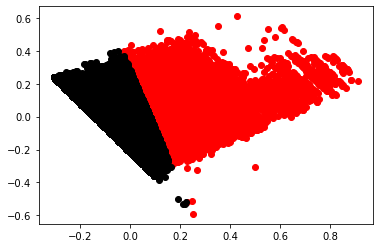

In [123]:
# plotting the results
filtered_label0 = df_reduced[labels == 0]
 
filtered_label1 = df_reduced[labels == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

In [124]:
# Adding labels to dataframe
train_df_scaled['labels']=labels

In [125]:
train_df_scaled['labels'].value_counts()

1    59636
0    19132
Name: labels, dtype: int64

In [126]:
X=train_df_scaled.drop(['labels'], axis=1)
y=train_df_scaled['labels']

In [127]:
input_shape=(X.shape[1], )

model4=Sequential()
model4.add(Dense(64,activation='relu',input_shape=input_shape,kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model4.add((Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))))
model4.add(Dropout(0.4))
model4.add(BatchNormalization())
model4.add((Dense(16,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))))
model4.add(Dense(1, activation='sigmoid',kernel_initializer=he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
model4.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

model4.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                384       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 16)                1040      
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                      

In [128]:
path=r'C:\Users\DELL\Desktop\Assesment'

In [129]:
checkpoint = ModelCheckpoint(os.path.join(path, 'model_2.hdf5'), monitor = 'val_acc')
history=model4.fit(X,y,epochs=10,verbose=1,batch_size=32, validation_split=0.2, shuffle=True,callbacks=[checkpoint])

Epoch 1/10
1970/1970 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9090 - val_loss: 0.1124 - val_accuracy: 0.9924
Epoch 2/10
1970/1970 [==============================] - 3s 2ms/step - loss: 0.1495 - accuracy: 0.9659 - val_loss: 0.0836 - val_accuracy: 0.9964
Epoch 3/10
1970/1970 [==============================] - 3s 2ms/step - loss: 0.1284 - accuracy: 0.9720 - val_loss: 0.0772 - val_accuracy: 0.9937
Epoch 4/10
1970/1970 [==============================] - 3s 2ms/step - loss: 0.1152 - accuracy: 0.9759 - val_loss: 0.0699 - val_accuracy: 0.9976
Epoch 5/10
1970/1970 [==============================] - 3s 2ms/step - loss: 0.1071 - accuracy: 0.9787 - val_loss: 0.0661 - val_accuracy: 0.9977
Epoch 6/10
1970/1970 [==============================] - 3s 2ms/step - loss: 0.1011 - accuracy: 0.9806 - val_loss: 0.0631 - val_accuracy: 0.9975
Epoch 7/10
1970/1970 [==============================] - 3s 2ms/step - loss: 0.0981 - accuracy: 0.9818 - val_loss: 0.0610 - val_accuracy:

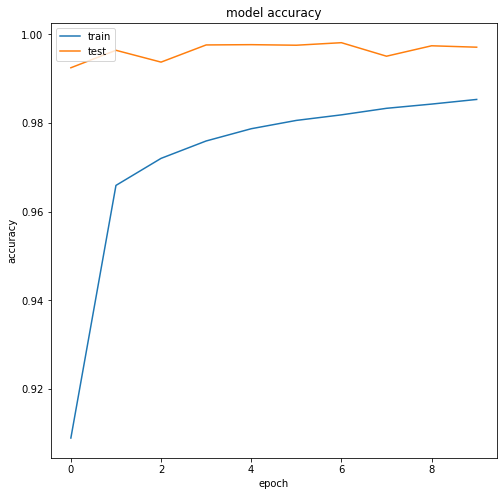

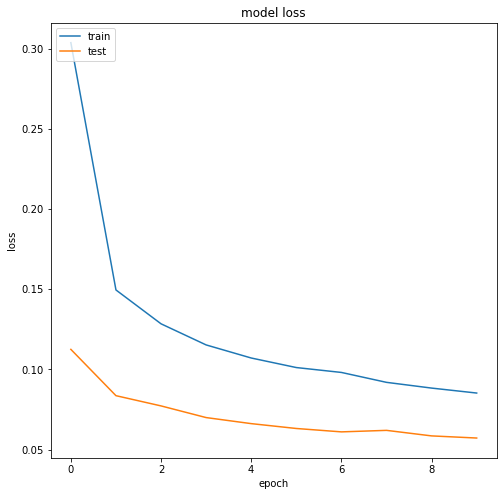

In [130]:
# machine learning mastery
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Taken a random sample of points to check the model,how model is performing.

In [131]:
import random
random_list=random.sample(range(len(y)), 40000)
X_test_sample = X.loc[random_list]
y_test_sample = y[random_list].values

In [132]:
y_pred=model4.predict(X_test_sample)


print(y_test)
print(len(y_test))

[1 1 0 ... 0 0 0]
19692


In [133]:
result=list(map(lambda x:1 if x>=0.5 else 0,y_pred))
print(len(result))
# print(result)

40000


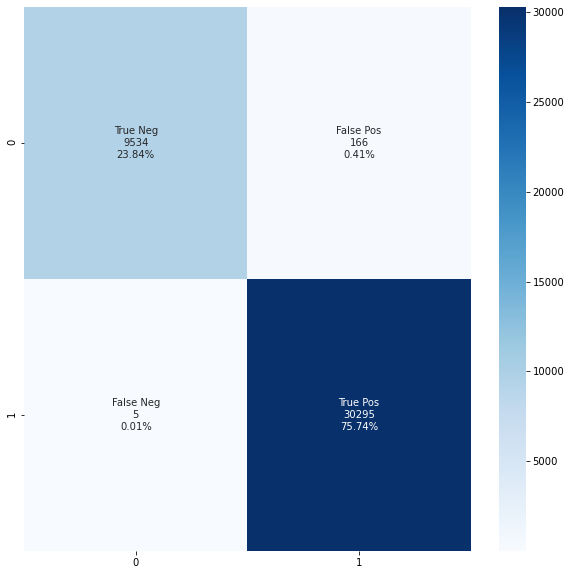

In [134]:
cf_matrix=(confusion_matrix(y_test_sample,result))


# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
plt.figure(figsize=(10,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

In [135]:
print(classification_report(y_test_sample, result))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9700
           1       0.99      1.00      1.00     30300

    accuracy                           1.00     40000
   macro avg       1.00      0.99      0.99     40000
weighted avg       1.00      1.00      1.00     40000



In [136]:
mean_age=data['Age'].mean()

In [137]:
print(mean_age)

45.50284379443429


# Testing

In [138]:
data_test=pd.read_csv('test_data_evaluation_part2.csv')
data_test.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,1,15,5,16,16,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0


In [139]:
data_test.isna().sum()

Unnamed: 0               0
ID                       0
Nationality              0
Age                     33
DaysSinceCreation        0
AverageLeadTime          0
LodgingRevenue           0
OtherRevenue             0
BookingsCanceled         0
BookingsNoShowed         0
BookingsCheckedIn        0
PersonsNights            0
RoomNights               0
DaysSinceLastStay        0
DaysSinceFirstStay       0
DistributionChannel      0
MarketSegment            0
SRHighFloor              0
SRLowFloor               0
SRAccessibleRoom         0
SRMediumFloor            0
SRBathtub                0
SRShower                 0
SRCrib                   0
SRKingSizeBed            0
SRTwinBed                0
SRNearElevator           0
SRAwayFromElevator       0
SRNoAlcoholInMiniBar     0
SRQuietRoom              0
dtype: int64

As there are nan values in age column,I have filled it with the mean age value from train dataset

In [140]:
data_test['Age']=data_test['Age'].fillna(mean_age)

In [141]:
data_test.isna().sum()

Unnamed: 0              0
ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [142]:
data_test.shape

(1000, 30)

In [143]:
data_test['TotalRevenue']=data_test['LodgingRevenue'] + data_test['OtherRevenue']

data_test_new=data_test[['Age', 'AverageLeadTime', 'PersonsNights', 'RoomNights', 'TotalRevenue']]

In [144]:
data_test_new.shape

(1000, 5)

In [145]:
data_test_new.iloc[10]

Age                45.502844
AverageLeadTime     0.000000
PersonsNights       0.000000
RoomNights          0.000000
TotalRevenue        0.000000
Name: 10, dtype: float64

In [152]:
with open('model_min_max.pkl' , 'rb') as f:
    scaler = pickle.load(f)
    
model = load_model('model_1.hdf5')

In [153]:
scaled_data=scaler.transform(data_test_new)

y_test_predicted=model.predict(scaled_data)

In [154]:
result=list(map(lambda x:1 if x>=0.5 else 0,y_test_predicted))
print(result)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Conclusions

I've decided to use only columns that I think are most suitable for our task which is done in Model 4.

As we can see that Model1,Model2,Model3 with scaled dataframe,the results were similar or even more messy

Dummies feature which are made for categorical columns weren't necessary but can be used in the future.

